In [ ]:
# importing libraries 
import pandas as pd
import matplotlib.pyplot as plt


netflix_df = pd.read_csv('netflix_data.csv', index_col=0)

#inspecting the data 
print(netflix_df.head())

In [ ]:
# summary statistics of the data 
print(netflix_df.describe())

In [ ]:
# checking for null values 
print(netflix_df.isna().sum())

In [ ]:
# beginning the analysis 
movies_in_the_1990s = netflix_df[(netflix_df['release_year'] >= 1990) & (netflix_df['release_year'] < 2000) 
& (netflix_df['type'].str.lower() == 'movie')]

print(movies_in_the_1990s.head())


In [74]:
# filtering out action movies only 

action_movies_1990 = movies_in_the_1990s[movies_in_the_1990s['genre'].str.lower() == 'action']
print(action_movies_1990.shape)

(48, 10)


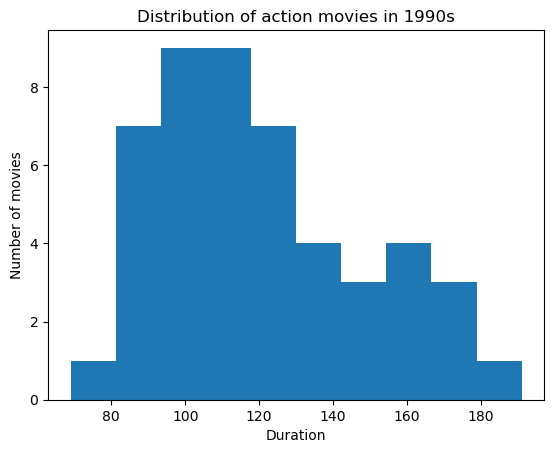

In [69]:
#creating a visualization 
plt.hist(action_movies_1990['duration'])
plt.xlabel('Duration')
plt.ylabel('Number of movies')
plt.title('Distribution of action movies in 1990s')
plt.show()

In [70]:
# summary stats (duration) of action movies in the 1990s
movie_stats = action_movies_1990['duration'].agg([ 'min','max','mean', 'median','std']).round(2)
print(movie_stats)

min        69.00
max       191.00
mean      120.15
median    112.50
std        28.80
Name: duration, dtype: float64


In [76]:
#checking for outliers in movies 
def iqr(q3, q1):
    return q3 - q1

first_percentile = movies_in_the_1990s['duration'].quantile(0.25)
third_percentile = movies_in_the_1990s['duration'].quantile(0.75)

iqr_value = iqr(third_percentile, first_percentile)
lower_bound = first_percentile - 1.5 *  iqr_value
upper_bound = third_percentile + 1.5 * iqr_value

outliers = movies_in_the_1990s[(movies_in_the_1990s['duration'] < lower_bound) | (movies_in_the_1990s['duration'] > upper_bound)].sort_values(by='duration', ascending=False)

print(outliers)

count_of_outliers = outliers['title'].count()
print(count_of_outliers)


          type                        title          director        cast  \
show_id                                                                     
s7090    Movie      Tim Allen: Men Are Pigs       Ellen Brown   Tim Allen   
s920     Movie  Bill Hicks: One Night Stand  John Fortenberry  Bill Hicks   

                country         date_added  release_year  duration  \
show_id                                                              
s7090     United States  December 31, 2018          1990        30   
s920     United Kingdom  December 31, 2018          1991        28   

                                               description     genre  
show_id                                                               
s7090    Standup comedian Tim Allen delivers a set dedi...  Stand-Up  
s920     Bill Hicks remembers a wild night in 1989 and ...  Stand-Up  
2


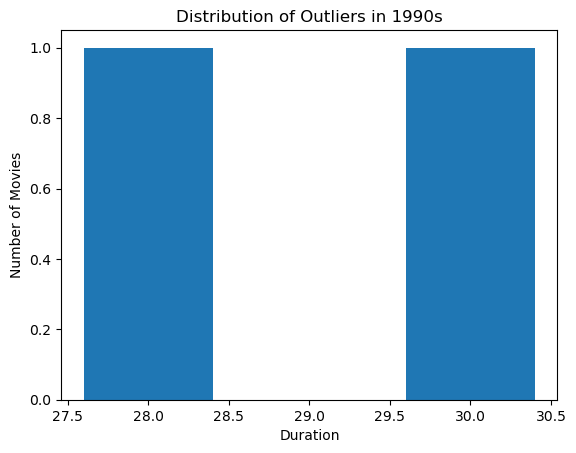

In [80]:
# creating a visualization for outliers 

outlier_counts = outliers['duration'].value_counts()
plt.bar(outlier_counts.index, outlier_counts.values)
plt.xlabel('Duration')
plt.ylabel('Number of Movies')
plt.title('Distribution of Outliers in 1990s')
plt.show()


In [72]:
# final analysis -- action movies below 90 minutes 
short_movies_count = (action_movies_1990['duration'] < 90).sum()
print(short_movies_count)

#using a for loop 

count_of_short_movies = 0 

for lab,row in action_movies_1990.iterrows():
    count_of_short_movies += row['duration'] < 90
print(count_of_short_movies)



7
7


In [ ]:
# filtering out the short movies 

short_movies_df = action_movies_1990[action_movies_1990['duration'] < 90].sort_values(by='duration', ascending=False)
print(short_movies_df[['title','release_year','duration']])